 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import datetime

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv=Path("../Resources/whale_returns.csv")
whale_path = pd.read_csv(whale_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_path.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_path.dropna(inplace=True)

whale_path.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv=Path("../Resources/algo_returns.csv")
algo_path = pd.read_csv(algo_csv, index_col="Date", parse_dates=True, infer_datetime_format=True )

In [6]:
# Count nulls
algo_path.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_path.dropna(inplace=True)
algo_path.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path=Path("../Resources/sp500_history.csv")
sp500_csv=pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_csv.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [9]:
# Check Data Types
sp500_csv.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_csv['Close'] = sp500_csv['Close'].str.replace('$', '')
sp500_csv.head()

<ipython-input-10-91a6a0b601c5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_csv['Close'] = sp500_csv['Close'].str.replace('$', '')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp500_csv['Close'] = sp500_csv['Close'].astype('float')
sp500_csv['Close'].dtype

dtype('float64')

In [12]:
sp500_csv.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
sp500_csv.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_daily=sp500_csv.pct_change()
sp500_daily.head(10)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038


In [15]:
# Drop nulls
sp500_daily.dropna(inplace=True)
sp500_daily.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily.rename(columns=({'Close':'SP500_Close'}), inplace=True)
sp500_daily

,SP500_Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_path, sp500_daily, whale_path], axis="columns", join="inner",)
combined_df.tail()

,Algo 1,Algo 2,SP500_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-15,-0.004331,-0.004572,-0.000509,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,-0.006945,0.002899,0.002279,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.010301,-0.005228,-0.001577,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,-0.000588,-0.001229,-0.001011,0.001448,0.001222,0.000582,0.001916
2019-04-22,0.000677,-0.001936,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

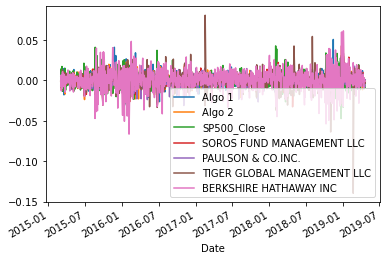

In [18]:
# Plot daily returns of all portfolios
combined_df.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

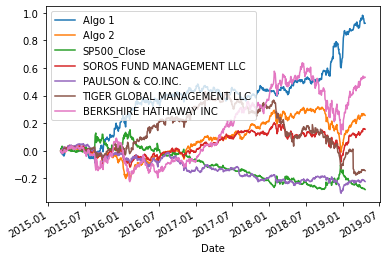

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

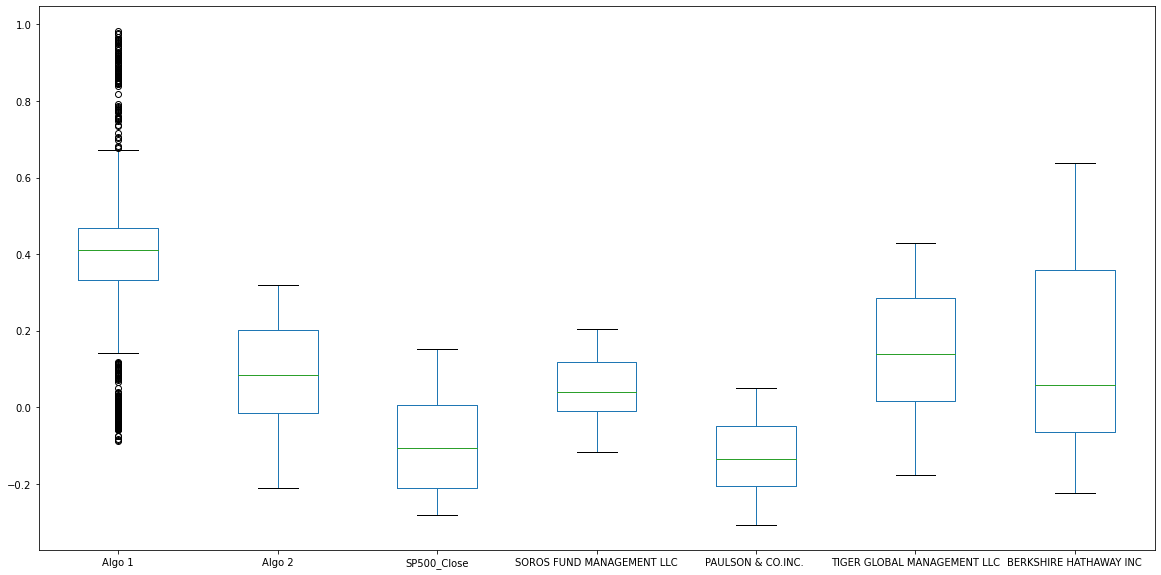

In [20]:
# Box plot to visually show risk
cumulative_returns.plot(kind="box", figsize=(20,10))

### Calculate Standard Deviations

<AxesSubplot:xlabel='Date'>

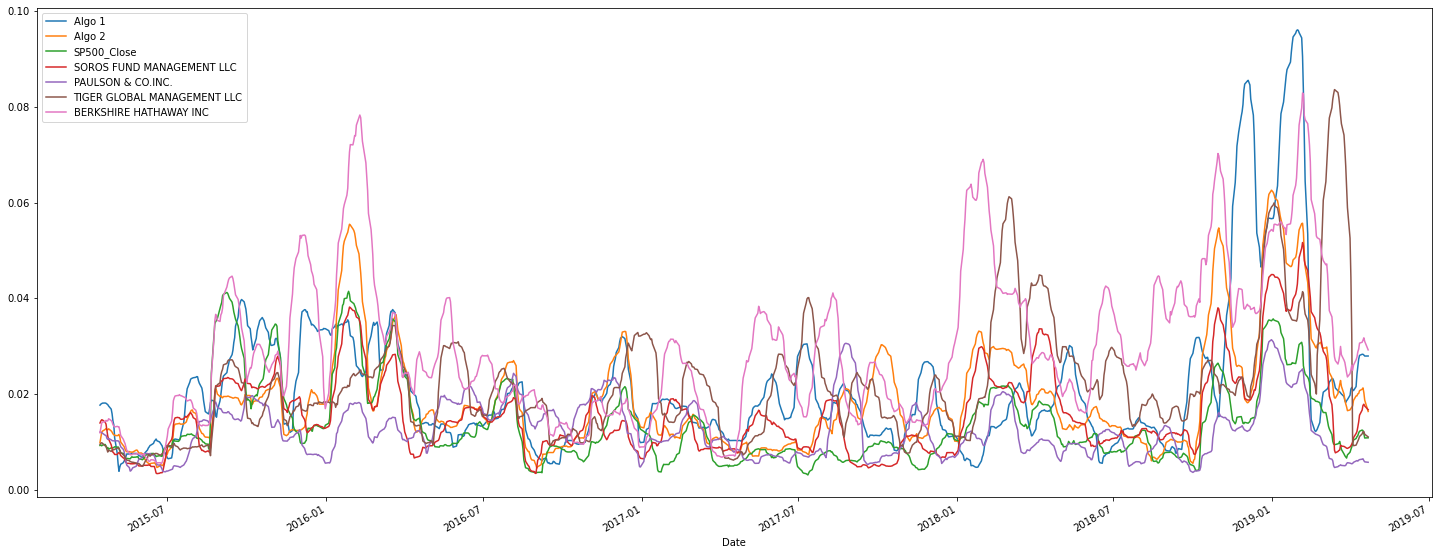

In [21]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.rolling(window=30).std().plot(figsize=(25,10))

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp_daily_returns = sp500_daily.std()

# Determine which portfolios are riskier than the S&P 500
combined_dev=cumulative_returns.std()

stringg=f'SP_500{sp_daily_returns}'
string_=f'Total{combined_dev}'

In [23]:
print(stringg)

SP_500SP500_Close    0.008135
dtype: float64


### Calculate the Annualized Standard Deviation

In [24]:
print(string_)

TotalAlgo 1                         0.231772
Algo 2                         0.131642
SP500_Close                    0.114846
SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
dtype: float64


In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_dev * np.sqrt(252)
annualized_std.head()

Algo 1                       3.679263
Algo 2                       2.089756
SP500_Close                  1.823124
SOROS FUND MANAGEMENT LLC    1.161806
PAULSON & CO.INC.            1.404053
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

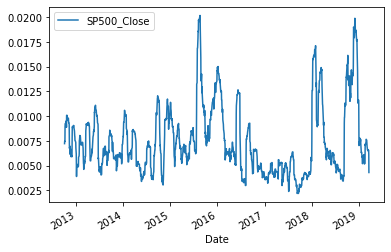

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
weekly_sp500= sp500_daily.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

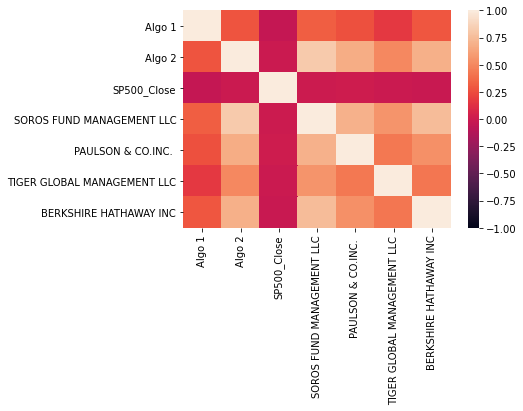

In [27]:
# Calculate the correlation
corr_returns=combined_df.corr()
# Display de correlation matrix
sns.heatmap(corr_returns, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

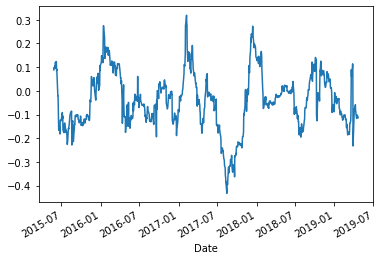

In [28]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500_Close'])
# Calculate variance of S&P 500
variance = combined_df['SP500_Close'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

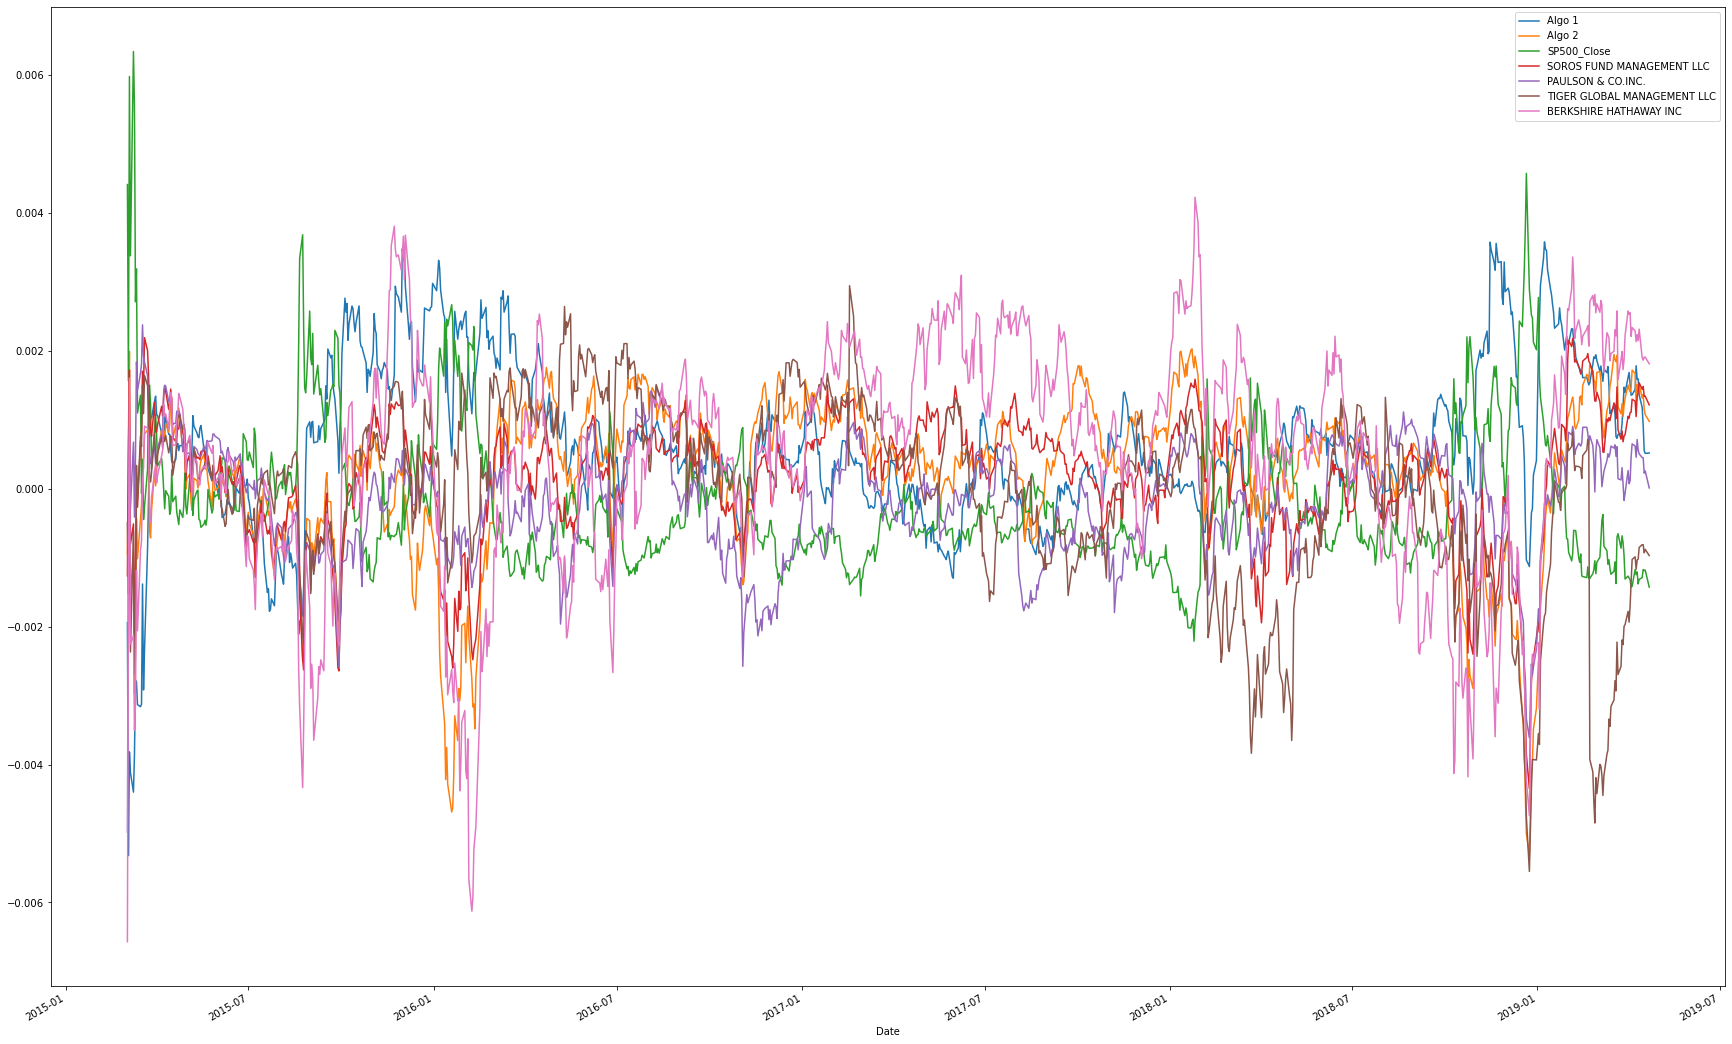

In [29]:
# Use `ewm` to calculate the rolling window

combined_df.ewm(halflife=21).mean().plot(figsize=(30,20))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_dev.mean() * 252) / (combined_dev * np.sqrt(252))
sharpe_ratios

Algo 1                         10.087189
Algo 2                         17.759691
SP500_Close                    20.357043
SOROS FUND MANAGEMENT LLC      31.944583
PAULSON & CO.INC.              26.433069
TIGER GLOBAL MANAGEMENT LLC    15.622373
BERKSHIRE HATHAWAY INC          9.685587
dtype: float64

<AxesSubplot:>

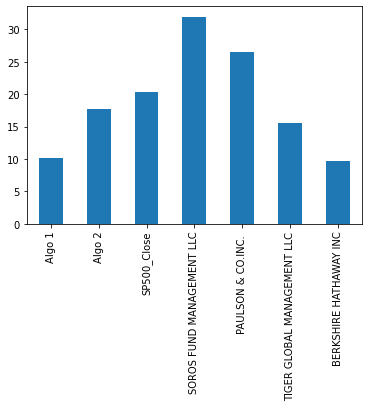

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

Yes they do

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock
goog_csv=Path("../Resources/goog_historical.csv")


In [33]:
goog_path = pd.read_csv(goog_csv, parse_dates=['Trade DATE'], infer_datetime_format=True)

In [34]:
# Reading data from 2nd stock
aapl_csv=Path("../Resources/aapl_historical.csv")


In [35]:
aapl_path = pd.read_csv(aapl_csv, parse_dates=['Trade DATE'], infer_datetime_format=True)

In [36]:
# Reading data from 3rd stock
cost_csv=Path("../Resources/cost_historical.csv")


In [37]:
cost_path = pd.read_csv(cost_csv, parse_dates=['Trade DATE'], infer_datetime_format=True)

In [38]:
# Combine all stocks in a single DataFrame
comb_df = pd.concat([goog_path, aapl_path, cost_path], axis="columns", join="inner")

In [39]:
comb_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,GOOG,2019-05-09,1162.38,AAPL,2019-05-09,200.72,COST,2019-05-09,243.47
1,GOOG,2019-05-08,1166.27,AAPL,2019-05-08,202.90,COST,2019-05-08,241.34
2,GOOG,2019-05-07,1174.10,AAPL,2019-05-07,202.86,COST,2019-05-07,240.18
3,GOOG,2019-05-06,1189.39,AAPL,2019-05-06,208.48,COST,2019-05-06,244.23
4,GOOG,2019-05-03,1185.40,AAPL,2019-05-03,211.75,COST,2019-05-03,244.62


In [40]:
columns = ["Jack", "Trade_Date", "GOOG", "John","DropA", "AAPL", "Jack","DropA", "Cost"]
comb_df.columns = columns
comb_df.head()

,Jack,Trade_Date,GOOG,John,DropA,AAPL,Jack,DropA,Cost
0,GOOG,2019-05-09,1162.38,AAPL,2019-05-09,200.72,COST,2019-05-09,243.47
1,GOOG,2019-05-08,1166.27,AAPL,2019-05-08,202.90,COST,2019-05-08,241.34
2,GOOG,2019-05-07,1174.10,AAPL,2019-05-07,202.86,COST,2019-05-07,240.18
3,GOOG,2019-05-06,1189.39,AAPL,2019-05-06,208.48,COST,2019-05-06,244.23
4,GOOG,2019-05-03,1185.40,AAPL,2019-05-03,211.75,COST,2019-05-03,244.62


In [41]:
# Reset Date index
comb_df.sort_index(inplace=True)
comb_df.head()

,Jack,Trade_Date,GOOG,John,DropA,AAPL,Jack,DropA,Cost
0,GOOG,2019-05-09,1162.38,AAPL,2019-05-09,200.72,COST,2019-05-09,243.47
1,GOOG,2019-05-08,1166.27,AAPL,2019-05-08,202.90,COST,2019-05-08,241.34
2,GOOG,2019-05-07,1174.10,AAPL,2019-05-07,202.86,COST,2019-05-07,240.18
3,GOOG,2019-05-06,1189.39,AAPL,2019-05-06,208.48,COST,2019-05-06,244.23
4,GOOG,2019-05-03,1185.40,AAPL,2019-05-03,211.75,COST,2019-05-03,244.62


In [42]:
# Reorganize portfolio data by having a column per symbol
comb_df=comb_df.drop(columns=["Jack", "John","DropA", "Jack","DropA"])


In [43]:
comb_df.head()

,Trade_Date,GOOG,AAPL,Cost
0,2019-05-09,1162.38,200.72,243.47
1,2019-05-08,1166.27,202.90,241.34
2,2019-05-07,1174.10,202.86,240.18
3,2019-05-06,1189.39,208.48,244.23
4,2019-05-03,1185.40,211.75,244.62


In [44]:
comb_dff=comb_df.set_index(comb_df['Trade_Date'])
comb_dff.head()

,Trade_Date,GOOG,AAPL,Cost
Trade_Date,,,,
2019-05-09,2019-05-09,1162.38,200.72,243.47
2019-05-08,2019-05-08,1166.27,202.90,241.34
2019-05-07,2019-05-07,1174.10,202.86,240.18
2019-05-06,2019-05-06,1189.39,208.48,244.23
2019-05-03,2019-05-03,1185.40,211.75,244.62


In [45]:
comb_dff=comb_dff.drop(columns=["Trade_Date"])
comb_dff.head()

,GOOG,AAPL,Cost
Trade_Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [46]:
# Calculate daily returns
daily_returns = comb_dff.pct_change()
daily_returns.head()

,GOOG,AAPL,Cost
Trade_Date,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597


In [47]:
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.sample(15)

,GOOG,AAPL,Cost
Trade_Date,,,
2018-06-29,-0.010475,-0.011059,0.004760
2018-09-20,0.017820,0.010889,-0.003578
2019-03-06,0.012735,0.011710,0.011255
2018-06-14,-0.000122,0.010379,-0.010612
2019-01-15,-0.003534,-0.012069,0.004044
2018-11-26,0.004031,0.002181,-0.015963
2018-05-24,0.003328,-0.002280,0.002672
2018-06-20,0.010521,0.005608,-0.009430
2018-07-16,-0.012462,-0.002821,-0.000698


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()


Trade_Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

In [49]:
comb_df.rename(columns={"Trade_Date":"Date"}, inplace = True)

In [50]:
comb_df.set_index(comb_df['Date'], inplace=True)

In [51]:
comb_df.drop(columns=["Date"], inplace=True)

In [52]:
comb_df=comb_df.pct_change()

In [53]:
comb_df.tail()

,GOOG,AAPL,Cost
Date,,,
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255
2018-05-14,0.019431,0.009172,0.002046
2018-05-11,-0.001763,0.002339,-0.000613


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
cdf = pd.concat([combined_df, comb_df], axis="columns", join="inner")
cdf.head(100)

,Algo 1,Algo 2,SP500_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,GOOG,AAPL,Cost
Date,,,,,,,,,,
2018-05-11,0.000358,0.000281,-0.000883,-0.004717,0.000982,0.002624,-0.004125,-0.001763,0.002339,-0.000613
2018-05-14,0.000915,0.001635,0.006889,0.000000,0.000000,0.000000,0.000000,0.019431,0.009172,0.002046
2018-05-15,-0.001135,-0.001139,-0.004044,-0.000726,-0.001409,-0.003189,-0.014606,-0.002348,-0.009246,-0.016255
2018-05-16,-0.002326,0.003341,0.000857,0.008637,0.006244,0.005480,0.004310,0.002948,0.006364,-0.004459
2018-05-17,-0.006949,0.005205,0.002639,-0.001955,0.002524,-0.006267,-0.005140,0.011469,0.003650,0.003217
...,...,...,...,...,...,...,...,...,...,...
2018-09-26,0.001034,-0.003170,-0.002756,-0.005043,-0.002545,-0.006773,0.007576,-0.011845,-0.020138,-0.000812
2018-09-27,0.003262,-0.001825,0.000007,0.003527,0.003482,-0.001143,0.005109,0.000980,-0.003500,-0.003747
2018-09-28,-0.000192,-0.001975,-0.003628,0.002186,0.002045,-0.001476,-0.002684,-0.001539,-0.006688,0.000980


In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cdf.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the annualized `std`
cdf.std()

Algo 1                         0.008419
Algo 2                         0.008769
SP500_Close                    0.009584
SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
GOOG                           0.016086
AAPL                           0.018953
Cost                           0.013618
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

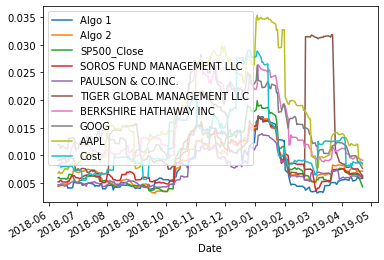

In [57]:
# Calculate rolling standard deviation
cdf.rolling(window=21).std()
# Plot rolling standard deviation
cdf.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

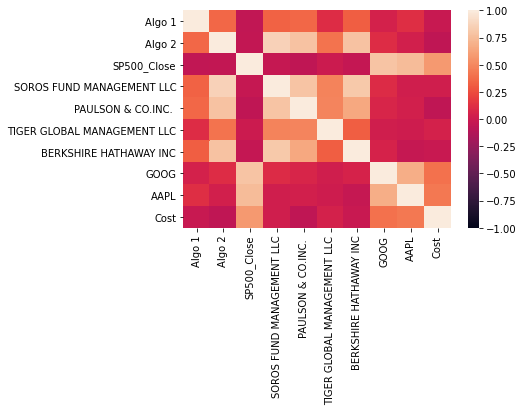

In [58]:
# Calculate and plot the correlation
cdf_returns=cdf.corr()
# Display de correlation matrix
sns.heatmap(cdf_returns, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

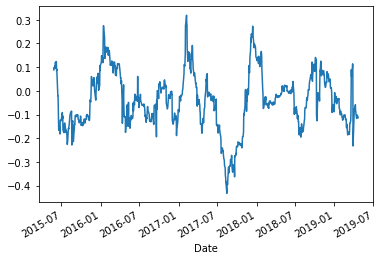

In [65]:
# Calculate and plot Beta

covariance_cdf = cdf.rolling(window=60).cov(cdf['SP500_Close'])

variance_cdf = cdf['SP500_Close'].rolling(window=60).var()

beta_cdf = covariance_cdf / variance_cdf

beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (cdf.mean() * 252) / (cdf.std() * np.sqrt(252))

<AxesSubplot:>

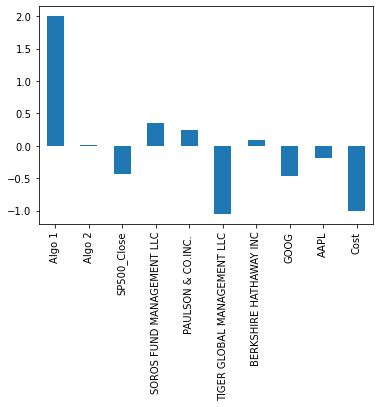

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
It does well